In [37]:
import os
from os.path import join
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
figroot = r"E:\OneDrive - Harvard University\BigGAN_Hessian"
syndir = join(figroot, "synopsis")
tuning_stats_synopsis_df = pd.read_pickle(join(syndir, f"ABCD_tuning_stats_synopsis.pkl"))
evol_stats_synopsis_df = pd.read_csv(join(syndir, f"ABCD_evol_stats_synopsis.csv"))

### Process the Tuning Axes

In [42]:
import numpy as np
np.unique(tuning_stats_synopsis_df.lin_dist_num.values, return_counts=True)

(array([ 1,  3,  4,  5,  6,  7,  8,  9, 11], dtype=int64),
 array([  4,   1,   2,   4,  10,   5, 309, 738, 172], dtype=int64))

In [43]:
tuning_stats_synopsis_df.head()

,space_name,eig_id,F_value,p_value,stats_str,lin_dist_set,lin_dist_num,avg_resp_per_lin_dist,max_resp_lin_dist,max_resp_val,Animal,Expi,ephysFN,stimuli,prefchan,prefunit,Exp_id,sig,is_BigGAN_evol_success
0,noise,0,3.465323,1.793685e-03,F-val: 3.47 | p-val: 1.8e-03,"[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0...",9,"[3.995903730392456, 1.479964256286621, 4.41176...",-0.16,16.845739,Caos,1.0,Caos-12022024-003,N:\Stimuli\Evolutions\2024\2024-12-02-Ev-Caos-...,91.0,2.0,Caos_1,True,True
1,noise,1,4.688895,8.846987e-05,F-val: 4.69 | p-val: 8.8e-05,"[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0...",9,"[8.657791137695312, 7.628445148468018, 18.1388...",-0.24,18.138840,Caos,1.0,Caos-12022024-003,N:\Stimuli\Evolutions\2024\2024-12-02-Ev-Caos-...,91.0,2.0,Caos_1,True,True
2,noise,2,2.228305,3.361004e-02,F-val: 2.23 | p-val: 3.4e-02,"[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0...",9,"[11.028430938720703, 6.682855129241943, 0.7399...",0.16,11.423381,Caos,1.0,Caos-12022024-003,N:\Stimuli\Evolutions\2024\2024-12-02-Ev-Caos-...,91.0,2.0,Caos_1,False,True
3,noise,3,13.480611,4.671396e-12,F-val: 13.48 | p-val: 4.7e-12,"[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0...",9,"[0.0, 3.3299193382263184, 26.63204002380371, 4...",-0.24,26.632040,Caos,1.0,Caos-12022024-003,N:\Stimuli\Evolutions\2024\2024-12-02-Ev-Caos-...,91.0,2.0,Caos_1,True,True
4,noise,5,3.396013,2.195186e-03,F-val: 3.40 | p-val: 2.2e-03,"[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0...",9,"[2.2199466228485107, 10.055503845214844, 2.959...",0.40,10.359751,Caos,1.0,Caos-12022024-003,N:\Stimuli\Evolutions\2024\2024-12-02-Ev-Caos-...,91.0,2.0,Caos_1,True,True


In [45]:
# Filter rows where lin_dist_num == 8
filtered_df = tuning_stats_synopsis_df[tuning_stats_synopsis_df['lin_dist_num'] == 8]
# Check if 0.0 is missing from lin_dist_set using a lambda function
missing_zero = filtered_df['lin_dist_set'].apply(lambda x: 0.0 not in x)
print(f"0.0 is missing from lin_dist_set for lin_dist_num == 8: {missing_zero.all()}")


0.0 is missing from lin_dist_set for lin_dist_num == 8: True


,space_name,eig_id,F_value,p_value,stats_str,lin_dist_set,lin_dist_num,avg_resp_per_lin_dist,max_resp_lin_dist,max_resp_val,Animal,Expi,ephysFN,stimuli,prefchan,prefunit,Exp_id,sig,is_BigGAN_evol_success
610,class,1,2.214328,4.714012e-02,F-val: 2.21 | p-val: 4.7e-02,"[-0.4, -0.32, -0.24, -0.16, 0.16, 0.24, 0.32, ...",8,"[71.57637023925781, 79.57755279541016, 70.9905...",0.24,102.061073,Alfa,15.0,Alfa-27102020-007,N:\Stimuli\2020-MovieStaticCmp\2020-10-27-Alfa...,9.0,1.0,Alfa_15,False,False
613,class,2,3.138788,8.073561e-03,F-val: 3.14 | p-val: 8.1e-03,"[-0.4, -0.32, -0.24, -0.16, 0.16, 0.24, 0.32, ...",8,"[102.92253875732422, 83.99677276611328, 79.036...",-0.40,102.922539,Alfa,15.0,Alfa-27102020-008,N:\Stimuli\2020-MovieStaticCmp\2020-10-27-Alfa...,9.0,1.0,Alfa_15,False,False
614,class,6,0.592557,7.584690e-01,F-val: 0.59 | p-val: 7.6e-01,"[-0.4, -0.32, -0.24, -0.16, 0.16, 0.24, 0.32, ...",8,"[76.14826202392578, 78.99576568603516, 71.3927...",0.16,96.070518,Alfa,15.0,Alfa-27102020-008,N:\Stimuli\2020-MovieStaticCmp\2020-10-27-Alfa...,9.0,1.0,Alfa_15,False,False
615,class,17,4.172544,1.444045e-03,F-val: 4.17 | p-val: 1.4e-03,"[-0.4, -0.32, -0.24, -0.16, 0.16, 0.24, 0.32, ...",8,"[65.30748748779297, 74.7879638671875, 69.54211...",0.40,105.168831,Alfa,15.0,Alfa-27102020-008,N:\Stimuli\2020-MovieStaticCmp\2020-10-27-Alfa...,9.0,1.0,Alfa_15,True,False
616,class,30,2.368141,3.910668e-02,F-val: 2.37 | p-val: 3.9e-02,"[-0.4, -0.32, -0.24, -0.16, 0.16, 0.24, 0.32, ...",8,"[89.64398956298828, 83.81938934326172, 46.5644...",0.16,93.384369,Alfa,15.0,Alfa-27102020-008,N:\Stimuli\2020-MovieStaticCmp\2020-10-27-Alfa...,9.0,1.0,Alfa_15,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,noise,8,9.925782,1.581887e-06,F-val: 9.93 | p-val: 1.6e-06,"[-0.4, -0.32, -0.24, -0.16, 0.16, 0.24, 0.32, ...",8,"[86.66719055175781, 119.81843566894531, 161.57...",0.24,207.757721,Beto,11.0,Beto-07092020-003,N:\Stimuli\2020-BigGAN\2020-09-07-Beto-01\2020...,5.0,2.0,Beto_11,True,True
1166,noise,10,8.392988,6.170127e-06,F-val: 8.39 | p-val: 6.2e-06,"[-0.4, -0.32, -0.24, -0.16, 0.16, 0.24, 0.32, ...",8,"[103.93243408203125, 161.84188842773438, 206.0...",-0.16,210.270920,Beto,11.0,Beto-07092020-003,N:\Stimuli\2020-BigGAN\2020-09-07-Beto-01\2020...,5.0,2.0,Beto_11,True,True
1167,noise,20,7.814848,1.629041e-05,F-val: 7.81 | p-val: 1.6e-05,"[-0.4, -0.32, -0.24, -0.16, 0.16, 0.24, 0.32, ...",8,"[98.18950653076172, 79.10820770263672, 114.081...",-0.16,176.161346,Beto,11.0,Beto-07092020-003,N:\Stimuli\2020-BigGAN\2020-09-07-Beto-01\2020...,5.0,2.0,Beto_11,True,True
1168,noise,30,14.357558,2.127651e-08,F-val: 14.36 | p-val: 2.1e-08,"[-0.4, -0.32, -0.24, -0.16, 0.16, 0.24, 0.32, ...",8,"[160.74212646484375, 149.61297607421875, 170.4...",-0.16,179.011963,Beto,11.0,Beto-07092020-003,N:\Stimuli\2020-BigGAN\2020-09-07-Beto-01\2020...,5.0,2.0,Beto_11,True,True


### Solely Hessian Experimental Analysis

In [4]:
common_axis_mask = tuning_stats_synopsis_df.lin_dist_set.map(lambda x: max(x) == 0.4)

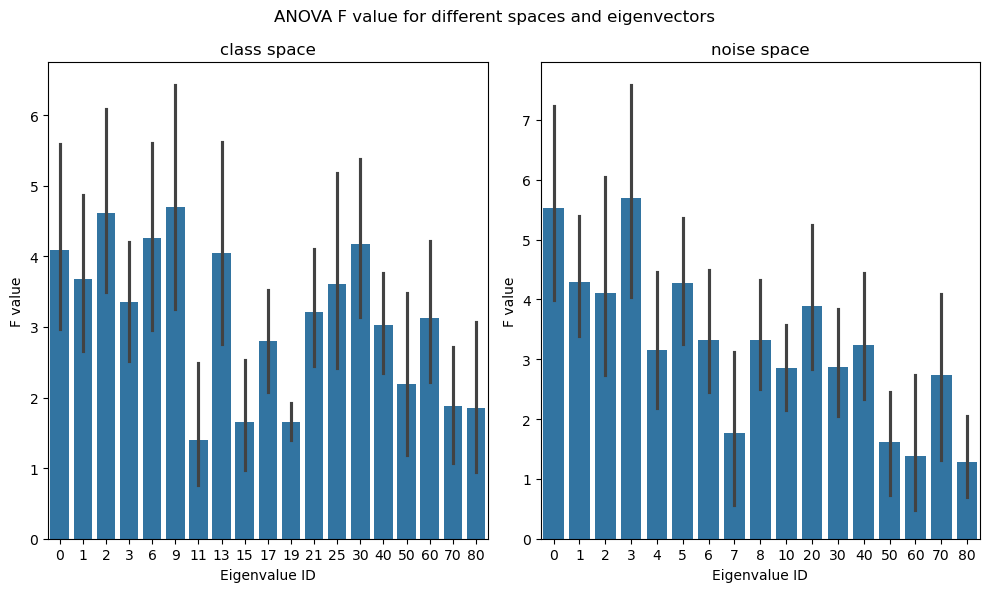

In [12]:
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.barplot(data=tuning_stats_synopsis_df[common_axis_mask].query("space_name == 'class'"), x='eig_id', y='F_value', ax=ax[0])
ax[0].set_title('class space')
ax[0].set_xlabel('Eigenvalue ID')
ax[0].set_ylabel('F value')

sns.barplot(data=tuning_stats_synopsis_df[common_axis_mask].query("space_name == 'noise'"), x='eig_id', y='F_value', ax=ax[1])
ax[1].set_title('noise space')
ax[1].set_xlabel('Eigenvalue ID')
ax[1].set_ylabel('F value')
fig.suptitle('ANOVA F value for different spaces and eigenvectors')
plt.tight_layout()
plt.show()

In [18]:
len(tuning_stats_synopsis_df[["Animal", "Expi"]].drop_duplicates())

52

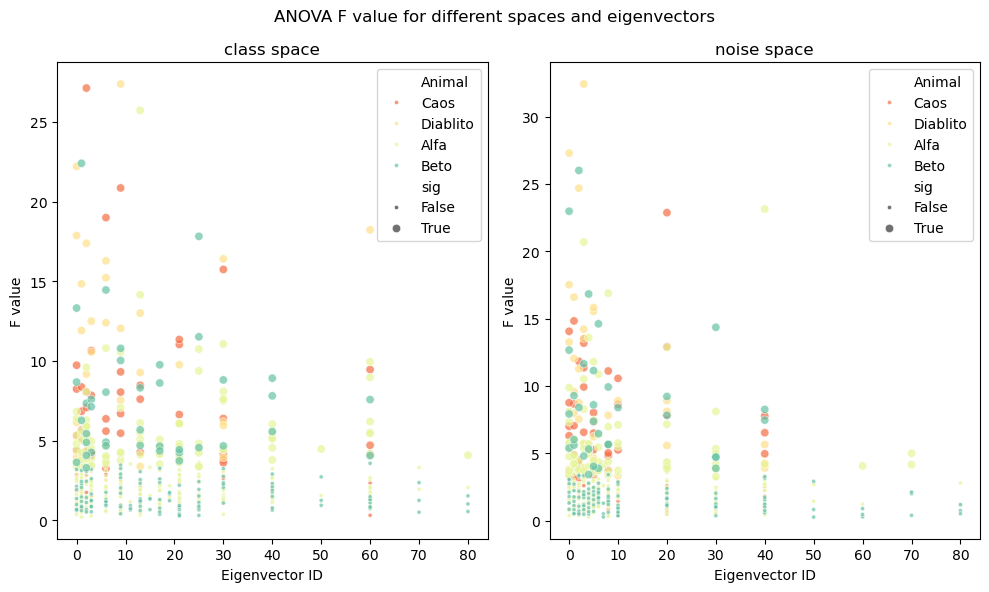

In [15]:
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("space_name == 'class'"), x='eig_id', y='F_value', ax=ax[0], 
                hue="Animal", palette="Spectral", 
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[0].set_title('class space')
ax[0].set_xlabel('Eigenvector ID')
ax[0].set_ylabel('F value')

sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("space_name == 'noise'"), x='eig_id', y='F_value', ax=ax[1], 
                hue="Animal", palette="Spectral",
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[1].set_title('noise space')
ax[1].set_xlabel('Eigenvector ID')
ax[1].set_ylabel('F value')

fig.suptitle('ANOVA F value for different spaces and eigenvectors')
plt.tight_layout()
plt.show()



In [9]:
common_axis_mask = tuning_stats_synopsis_df.lin_dist_set.map(lambda x: max(x) == 0.4)

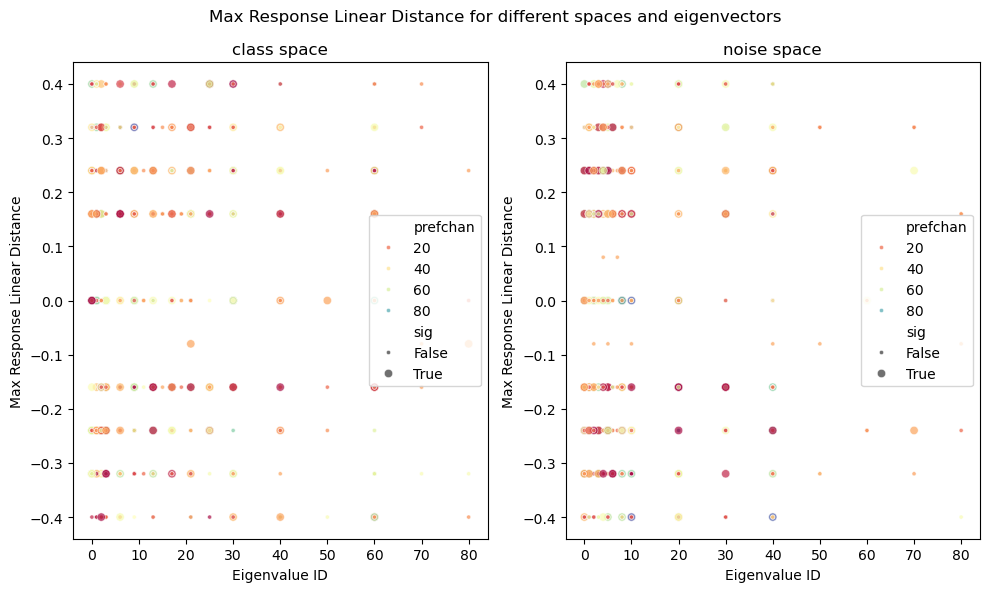

In [10]:
import seaborn as sns
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("space_name == 'class'"), x='eig_id', y='max_resp_lin_dist', ax=ax[0], 
                hue="prefchan", palette="Spectral", 
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[0].set_title('class space')
ax[0].set_xlabel('Eigenvalue ID')
ax[0].set_ylabel('Max Response Linear Distance')

sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("space_name == 'noise'"), x='eig_id', y='max_resp_lin_dist', ax=ax[1], 
                hue="prefchan", palette="Spectral",
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[1].set_title('noise space')
ax[1].set_xlabel('Eigenvalue ID')
ax[1].set_ylabel('Max Response Linear Distance')

fig.suptitle('Max Response Linear Distance for different spaces and eigenvectors')
plt.tight_layout()
plt.show()
# %%

### Evolution Hessian interaction analysis

In [10]:
tuning_stats_synopsis_df['Exp_id'] = tuning_stats_synopsis_df.apply(lambda row: f"{row['Animal']}_{int(row['Expi'])}", axis=1)
evol_stats_synopsis_df['Exp_id'] = evol_stats_synopsis_df.apply(lambda row: f"{row['Animal']}_{int(row['Expi'])}", axis=1)

In [ ]:
# 

In [15]:
# find masks of evolution that succeed on thread 1 
BigGAN_success_explist = evol_stats_synopsis_df.query("lastinit_thr1_pval < 0.01")['Exp_id']
# find the corresponding masks in tuning stats
BigGAN_success_mask_tuning_stats = tuning_stats_synopsis_df.query("Exp_id in @BigGAN_success_explist")
BigGAN_fail_mask_tuning_stats = tuning_stats_synopsis_df.query("Exp_id not in @BigGAN_success_explist")
# find the corresponding masks in tuning stats


In [14]:
BigGAN_success_mask_tuning_stats.shape
# %%


(714, 17)

In [16]:
BigGAN_fail_mask_tuning_stats.shape


(531, 17)

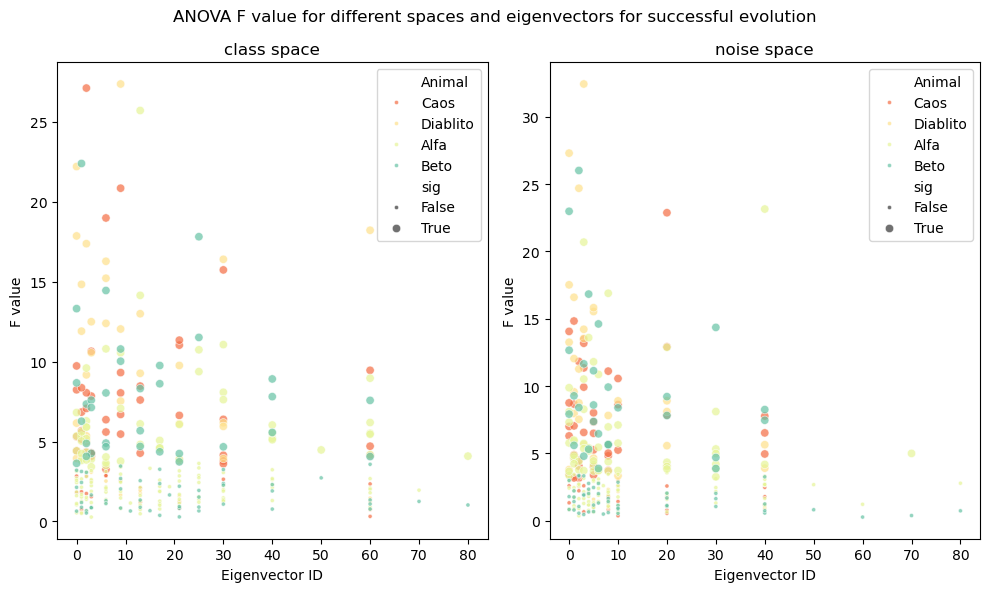

In [17]:
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist")\
                    .query("space_name == 'class'"), x='eig_id', y='F_value', ax=ax[0], 
                hue="Animal", palette="Spectral", 
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[0].set_title('class space')
ax[0].set_xlabel('Eigenvector ID')
ax[0].set_ylabel('F value')

sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist")\
                    .query("space_name == 'noise'"), x='eig_id', y='F_value', ax=ax[1], 
                hue="Animal", palette="Spectral",
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[1].set_title('noise space')
ax[1].set_xlabel('Eigenvector ID')
ax[1].set_ylabel('F value')

fig.suptitle('ANOVA F value for different spaces and eigenvectors for successful evolution')
plt.tight_layout()
plt.show()

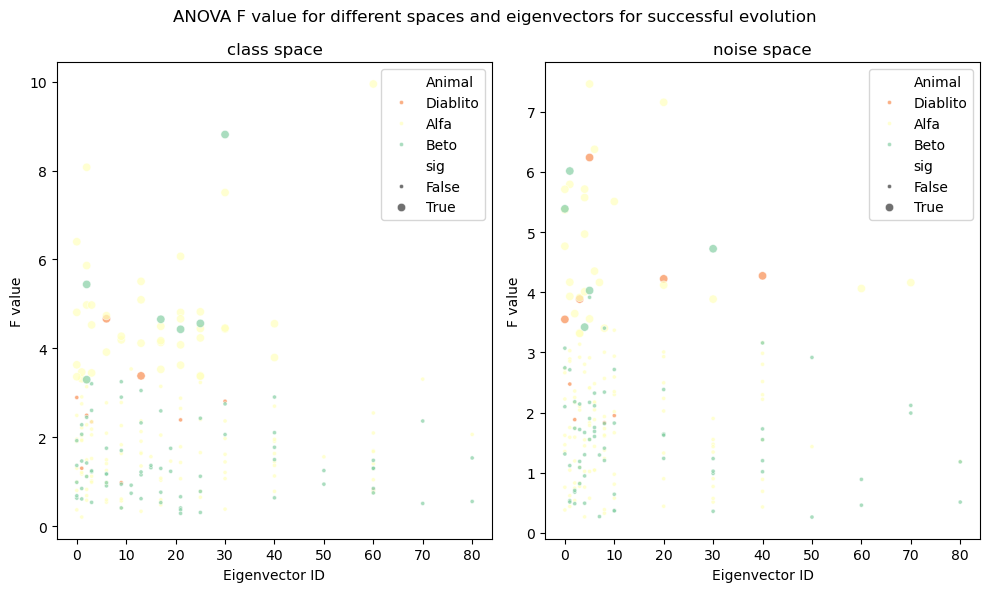

In [36]:
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist")\
                    .query("space_name == 'class'"), x='eig_id', y='F_value', ax=ax[0], 
                hue="Animal", palette="Spectral", 
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[0].set_title('class space')
ax[0].set_xlabel('Eigenvector ID')
ax[0].set_ylabel('F value')

sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist")\
                    .query("space_name == 'noise'"), x='eig_id', y='F_value', ax=ax[1], 
                hue="Animal", palette="Spectral",
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[1].set_title('noise space')
ax[1].set_xlabel('Eigenvector ID')
ax[1].set_ylabel('F value')

fig.suptitle('ANOVA F value for different spaces and eigenvectors for successful evolution')
plt.tight_layout()
plt.show()

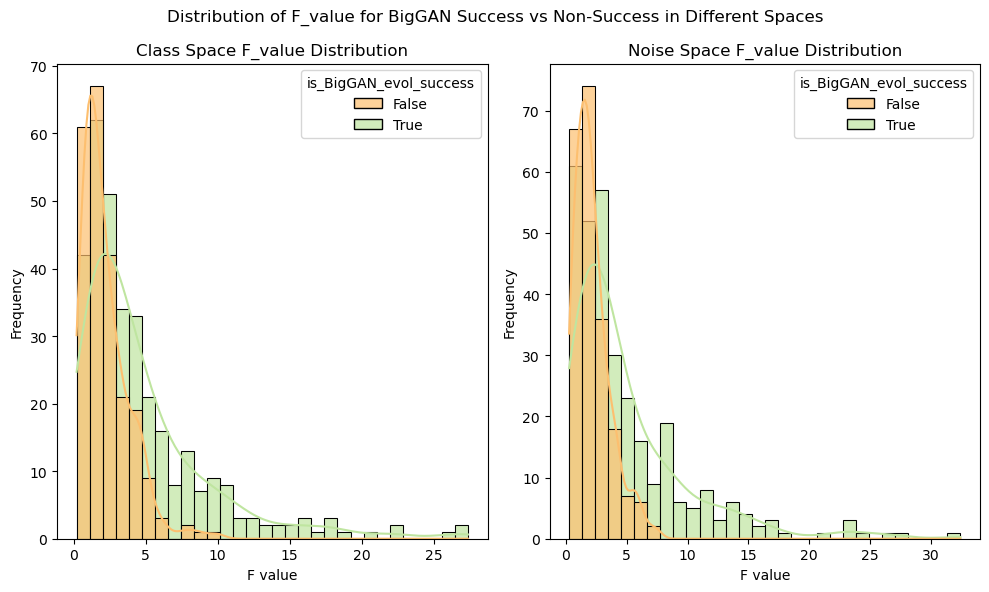

In [35]:
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
tuning_stats_synopsis_df['is_BigGAN_evol_success'] = tuning_stats_synopsis_df['Exp_id'].isin(BigGAN_success_explist)

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
# Plot histogram for class space
sns.histplot(data=tuning_stats_synopsis_df[common_axis_mask].query("space_name == 'class'"), 
             x='F_value', hue='is_BigGAN_evol_success', 
             ax=ax[0], palette="Spectral", bins=30, kde=True, alpha=0.7)
ax[0].set_title('Class Space F_value Distribution')
ax[0].set_xlabel('F value')
ax[0].set_ylabel('Frequency')

# Plot histogram for noise space
sns.histplot(data=tuning_stats_synopsis_df[common_axis_mask].query("space_name == 'noise'"), 
             x='F_value', hue='is_BigGAN_evol_success', 
             ax=ax[1], palette="Spectral", bins=30, kde=True, alpha=0.7)
ax[1].set_title('Noise Space F_value Distribution')
ax[1].set_xlabel('F value')
ax[1].set_ylabel('Frequency')

fig.suptitle('Distribution of F_value for BigGAN Success vs Non-Success in Different Spaces')
plt.tight_layout()
plt.show()


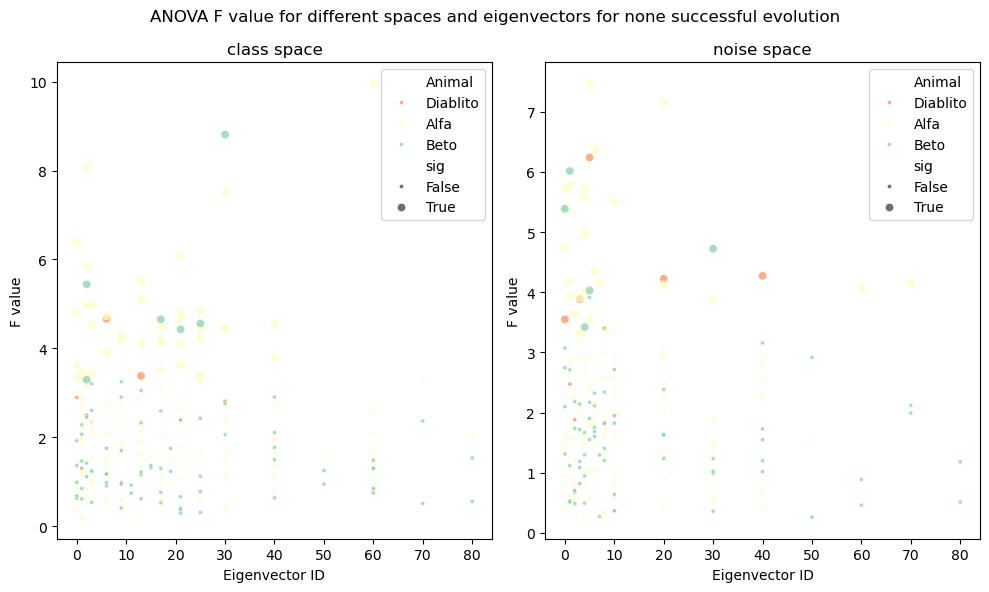

In [20]:
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist")\
                    .query("space_name == 'class'"), x='eig_id', y='F_value', ax=ax[0], 
                hue="Animal", palette="Spectral", 
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[0].set_title('class space')
ax[0].set_xlabel('Eigenvector ID')
ax[0].set_ylabel('F value')

sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist")\
                    .query("space_name == 'noise'"), x='eig_id', y='F_value', ax=ax[1], 
                hue="Animal", palette="Spectral",
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[1].set_title('noise space')
ax[1].set_xlabel('Eigenvector ID')
ax[1].set_ylabel('F value')

fig.suptitle('ANOVA F value for different spaces and eigenvectors for none successful evolution')
plt.tight_layout()
plt.show()


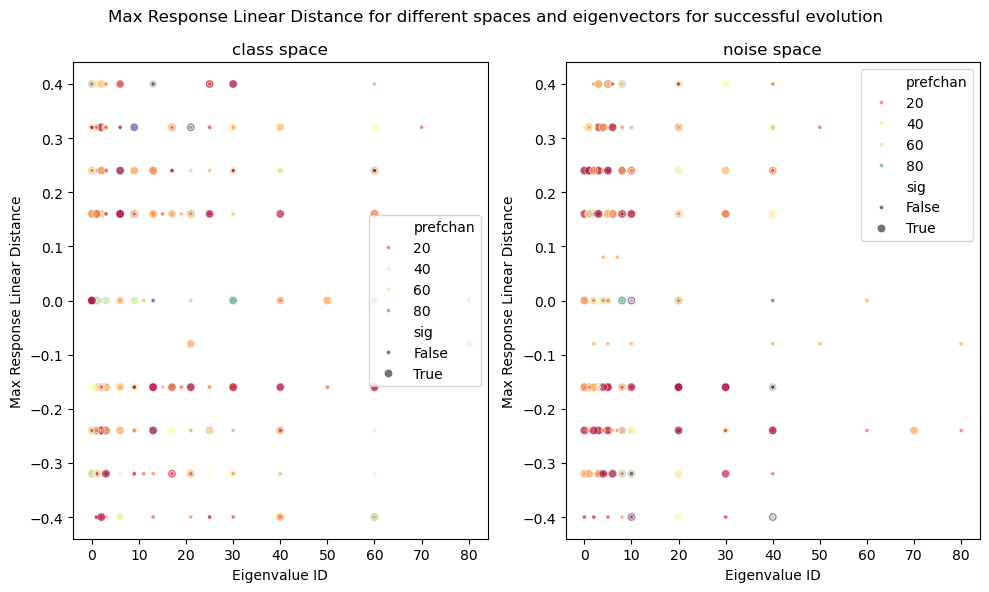

In [21]:
import seaborn as sns
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist").query("space_name == 'class'"), x='eig_id', y='max_resp_lin_dist', ax=ax[0], 
                hue="prefchan", palette="Spectral", 
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[0].set_title('class space')
ax[0].set_xlabel('Eigenvalue ID')
ax[0].set_ylabel('Max Response Linear Distance')

sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist").query("space_name == 'noise'"), x='eig_id', y='max_resp_lin_dist', ax=ax[1], 
                hue="prefchan", palette="Spectral",
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[1].set_title('noise space')
ax[1].set_xlabel('Eigenvalue ID')
ax[1].set_ylabel('Max Response Linear Distance')

fig.suptitle('Max Response Linear Distance for different spaces and eigenvectors for successful evolution')
plt.tight_layout()
plt.show()
# %%

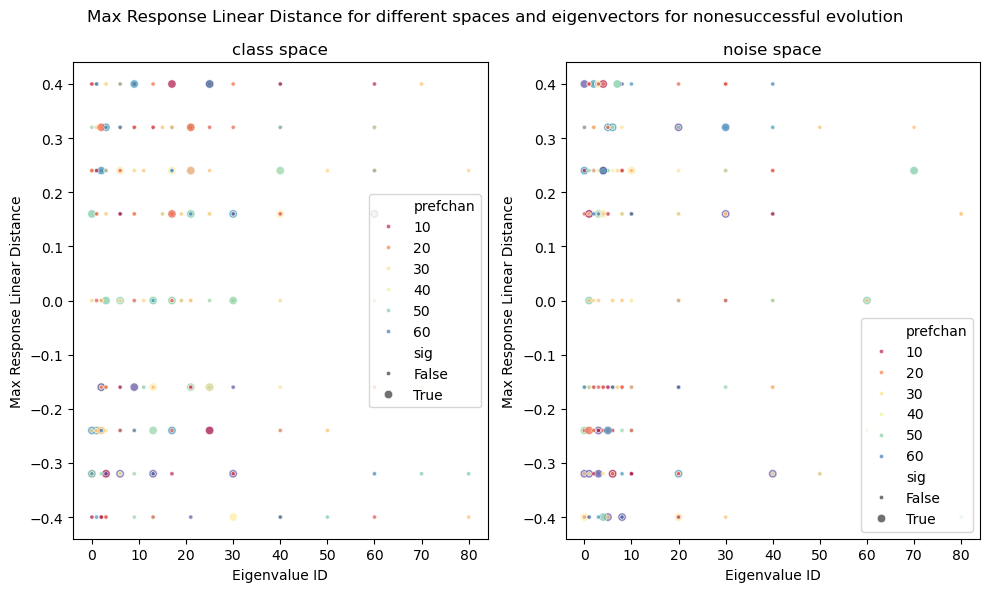

In [23]:
import seaborn as sns
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist").query("space_name == 'class'"), x='eig_id', y='max_resp_lin_dist', ax=ax[0], 
                hue="prefchan", palette="Spectral", 
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[0].set_title('class space')
ax[0].set_xlabel('Eigenvalue ID')
ax[0].set_ylabel('Max Response Linear Distance')

sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist").query("space_name == 'noise'"), x='eig_id', y='max_resp_lin_dist', ax=ax[1], 
                hue="prefchan", palette="Spectral",
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[1].set_title('noise space')
ax[1].set_xlabel('Eigenvalue ID')
ax[1].set_ylabel('Max Response Linear Distance')

fig.suptitle('Max Response Linear Distance for different spaces and eigenvectors for nonesuccessful evolution')
plt.tight_layout()
plt.show()
# %%

In [27]:
tuning_stats_synopsis_df.lin_dist_set.iloc[0]


[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4]

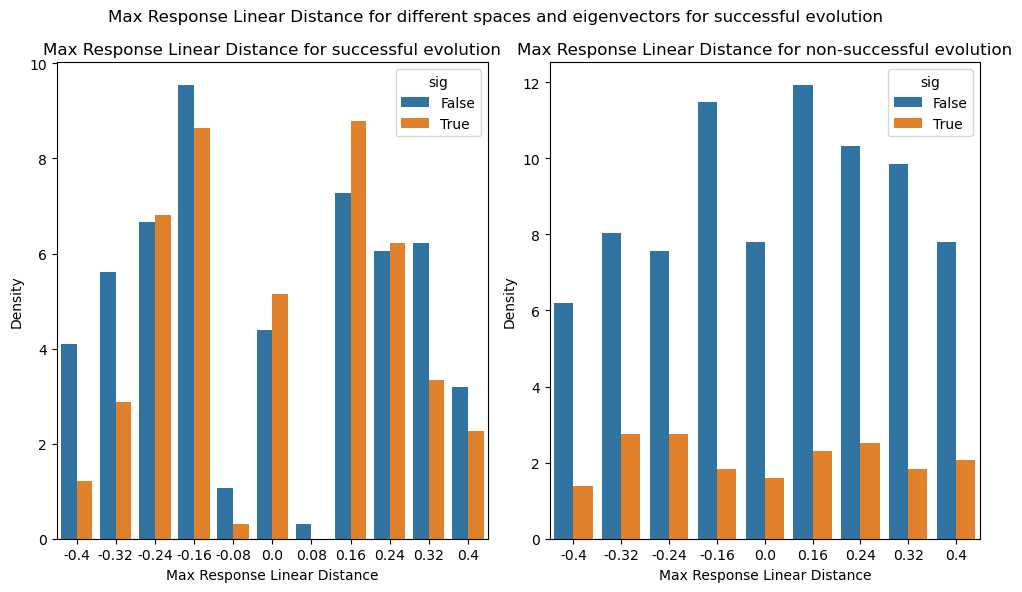

In [33]:
import seaborn as sns
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4]
sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist"), 
              x='max_resp_lin_dist', hue='sig', stat='percent', ax=ax[0], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
ax[0].set_title('Max Response Linear Distance for successful evolution')
ax[0].set_xlabel('Max Response Linear Distance')
ax[0].set_ylabel('Density')
sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist"), 
              x='max_resp_lin_dist', hue='sig', stat='percent', ax=ax[1], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
ax[1].set_title('Max Response Linear Distance for non-successful evolution')
ax[1].set_xlabel('Max Response Linear Distance')
ax[1].set_ylabel('Density')

fig.suptitle('Max Response Linear Distance for different spaces and eigenvectors for successful evolution')
plt.tight_layout()
plt.show()# %%


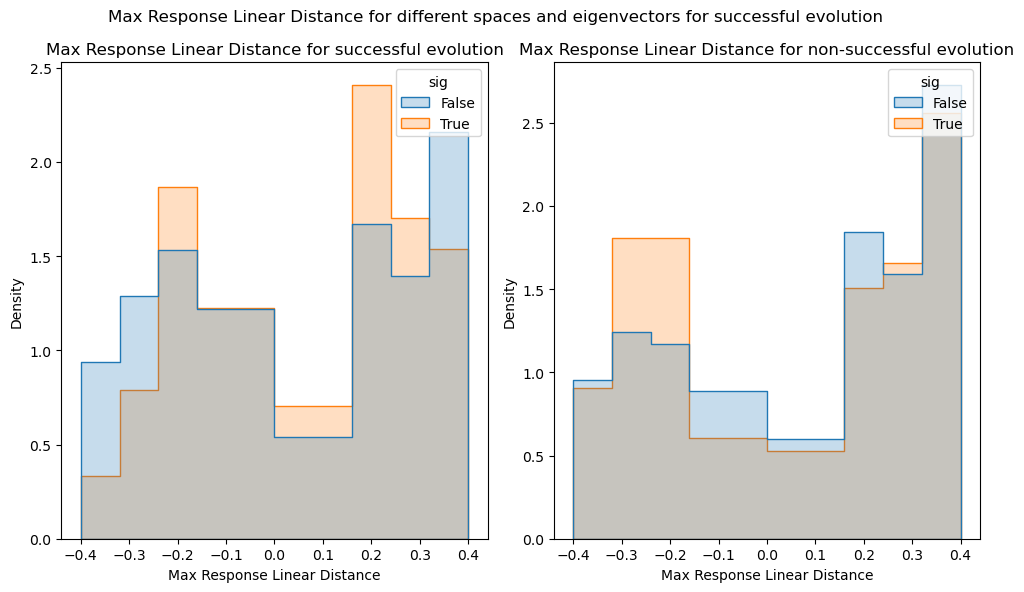

In [29]:
import seaborn as sns
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4]
sns.histplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist"), x='max_resp_lin_dist', hue='sig', element='step', stat='density', common_norm=False, ax=ax[0], bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
ax[0].set_title('Max Response Linear Distance for successful evolution')
ax[0].set_xlabel('Max Response Linear Distance')
ax[0].set_ylabel('Density')

sns.histplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist"), x='max_resp_lin_dist', hue='sig', element='step', stat='density', common_norm=False, ax=ax[1], bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
ax[1].set_title('Max Response Linear Distance for non-successful evolution')
ax[1].set_xlabel('Max Response Linear Distance')
ax[1].set_ylabel('Density')

# sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist").query("space_name == 'noise'"), x='eig_id', y='max_resp_lin_dist', ax=ax[1], 
#                 hue="prefchan", palette="Spectral",
#                 style='sig',  markers={True: "o", False: "."}, alpha=0.7)
# ax[1].set_title('noise space')
# ax[1].set_xlabel('Eigenvalue ID')
# ax[1].set_ylabel('Max Response Linear Distance')

fig.suptitle('Max Response Linear Distance for different spaces and eigenvectors for successful evolution')
plt.tight_layout()
plt.show()
# %%

In [ ]:
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist")\
                    .query("space_name == 'class'"), x='eig_id', y='F_value', ax=ax[0], 
                hue="Animal", palette="Spectral", 
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[0].set_title('class space')
ax[0].set_xlabel('Eigenvector ID')
ax[0].set_ylabel('F value')

sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist")\
                    .query("space_name == 'noise'"), x='eig_id', y='F_value', ax=ax[1], 
                hue="Animal", palette="Spectral",
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[1].set_title('noise space')
ax[1].set_xlabel('Eigenvector ID')
ax[1].set_ylabel('F value')

fig.suptitle('ANOVA F value for different spaces and eigenvectors for successful evolution')
plt.tight_layout()
plt.show()